# Import Libraries

In [40]:
# Importing required libraries
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_classif , SelectPercentile
from sklearn.cluster import KMeans
from sklearn.neighbors import RadiusNeighborsTransformer , NeighborhoodComponentsAnalysis

from sklearn.metrics import homogeneity_completeness_v_measure

In [1]:
# Getting features and target labels
with open('Labels_TargetFeatures.txt') as LabelsName:
    Target = LabelsName.readline().strip()
    Features = LabelsName.readline().split()

# Models Experimentation

Using the full dataset segmented into the three main groups, it was experimented with different model architectures attempting to improve V-Measure Score.

* First was attempted to use Mutual Information for Feature Selection and K-Means for predicting the group. This architecture had good results.
* The second architecture, uses Radius Neighbors for Feature Transformation to transform the features into distances between points.
* And the final attempt, the architecture with the best results and which will be used in the final model, uses Neighborhood Components Analysis for Feature Transformation and for reducing the distance between points with the same class assigned.

Although only was tested in one dataset, this architecture looks promising for the others datasets.

In [2]:
# Loading Dataset 
ObesityDataset_Groups = pd.read_csv('../Exploratory_Data_Analysis/ObesityLevel_Groups.csv',index_col=0)
X_features_groups = ObesityDataset_Groups[Features].to_numpy()
y_target_groups = ObesityDataset_Groups[Target].to_numpy()

# Splitting train-test 
X_train , X_test , y_train , y_test = train_test_split(X_features_groups,y_target_groups,test_size=0.2)

<Axes: xlabel='Weight', ylabel='Height'>

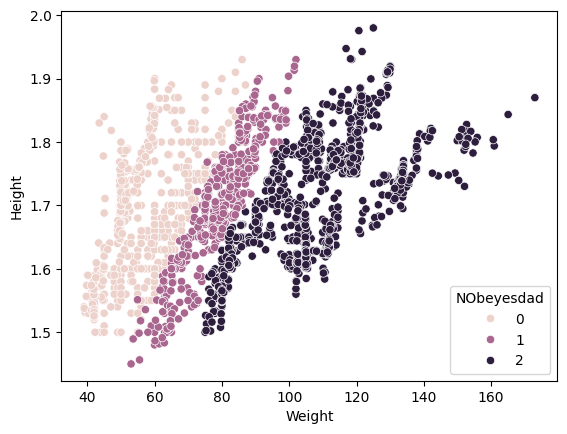

In [ ]:
# Expected Result
sns.scatterplot(ObesityDataset_Groups,x='Weight',y='Height',hue='NObeyesdad')

(np.float64(0.5399441020329163),
 np.float64(0.526349158206897),
 np.float64(0.5330599642351429))

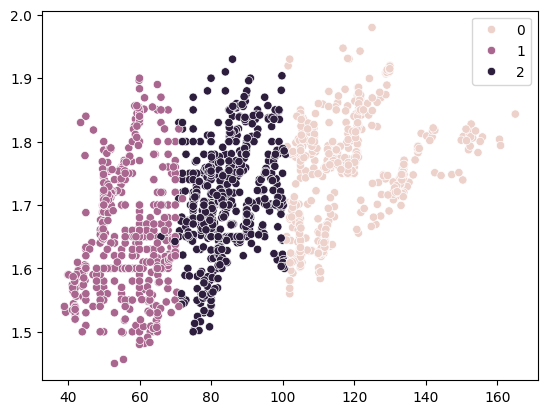

In [ ]:
"""
1° Option ::
    -- Feature Selection
    -- Clustering Algorithm
"""

ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=32)

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Clustering',KMeans(n_clusters=3,n_init=20)),
                               ]
                        )

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)

(np.float64(0.3787240106565636),
 np.float64(0.3990079920335596),
 np.float64(0.38860148869862354))

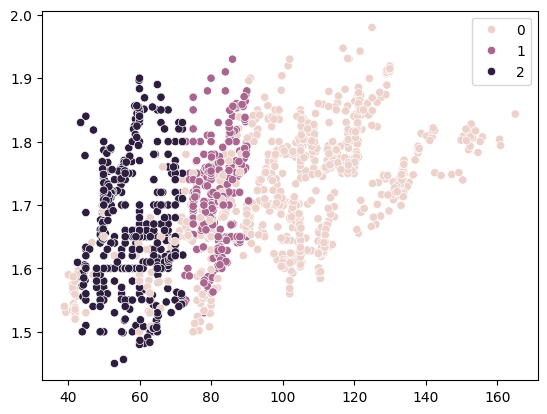

In [ ]:
"""
2° Option ::
    -- Feature Selection
    -- Feature Transformation :: Radius Neighbors
    -- Clustering Algorithm
"""

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Feature_Transformation',RadiusNeighborsTransformer(radius=32,n_jobs=-1)),
                                ('Clustering',KMeans(n_clusters=3,n_init=20)),
                               ]
                        )

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)

(np.float64(0.5492489996484953),
 np.float64(0.5367787483678764),
 np.float64(0.5429422795359057))

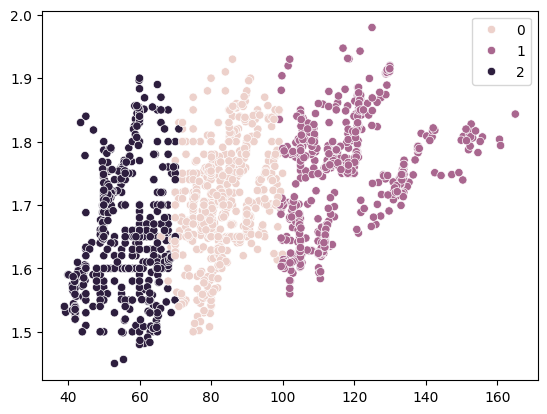

In [38]:
"""
3° Option ::
    -- Feature Selection
    -- Feature Transformation :: NCA
    -- Clustering Algorithm
"""

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Feature_Transformation',NeighborhoodComponentsAnalysis(n_components=4,init='pca')),
                                ('Clustering',KMeans(n_clusters=3,n_init=10)),
                               ]
                        )

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)